In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from collections import defaultdict
from sklearn.ensemble import RandomForestClassifier
import pprint

In [11]:
# Assignment Constants
RANDOM_STATE = 10
FIGSIZE = (12,8)
#### Use the following line before plt.plot(....) to increase the plot size ####
plt.figure(figsize=FIGSIZE)

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

## Question 1
Use the breast cancer data set from Homework 0 to create a training set. Recall that the
label is 0 if the patient’s data indicates a malignant cancer and 1 otherwise. Compute the
base rate of malignant cancer occurrence over the entire data set. In other words, what would
be your best guess for the probability of malignant cancer of a single example using only the
labels in the training set? This question is very simple, so try not to overthink it.

In [12]:
# Load the breast cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Compute the base rate of malignant cancer (label 0)
malignant_base_rate = np.mean(y == 0)
print(f"The base rate of malignant cancer occurrence is: {malignant_base_rate:.2f}")

The base rate of malignant cancer occurrence is: 0.37


## 2
The goal is to build a decision tree that, based on the other features in the set, predicts
whether or not a patient has malignant cancer. So this is a classification problem. Using
`tree.DecisionTreeClassifier` and other functions in the scikit-learn library, one can build
a decision tree and calculate both its training accuracy when fitted to the entire data set as
well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).
In this question you will need to complete two sub-components:
### (a)
(a) Make a plot visualizing the performance of a `tree.DecisionTreeClassifier` as you
search for an optimal `max_depth` parameter. Vary the depth of your decision tree using
max depth = 1,2,. . . ,10 and record the results from the following evaluation procedures
for each setting:
* The accuracy when training and testing on the full dataset.
* 10-fold cross-validated accuracy.

Plot the results of both evaluation procedures on the same plot with evaluation scores on
the y-axis and max depth values on the x-axis. Use 10 as your random seed/state for the
decision tree and the cross-validation. Use a legend to label both evaluation procedures.


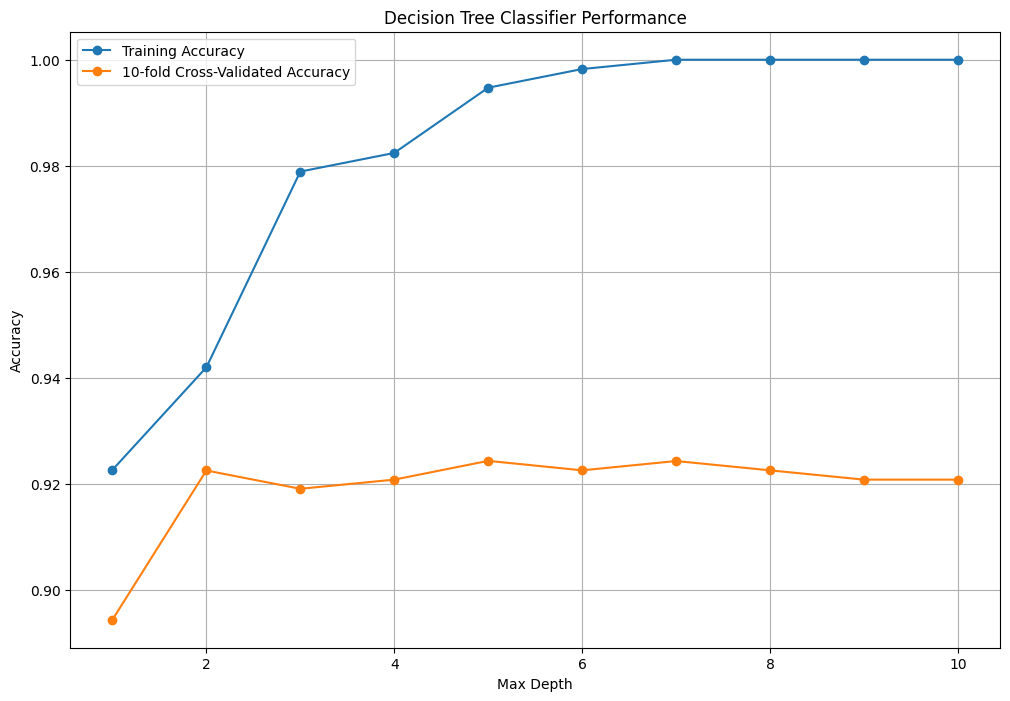

Best max_depth for full-dataset accuracy: [7, 8, 9, 10] with accuracy 1.00
Best max_depth for cross-validated accuracy: [5] with accuracy 0.92


In [14]:
# Lists to store the results
train_accuracies = []
cv_accuracies = []

# Varying max_depth from 1 to 10
max_depth_range = range(1, 11)

for max_depth in max_depth_range:
    # Initialize the DecisionTreeClassifier
    clf = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=RANDOM_STATE)

    # Fit the model on the entire dataset
    clf.fit(X, y)

    # Compute the training accuracy
    train_accuracy = clf.score(X, y)
    train_accuracies.append(train_accuracy)

    # Compute the 10-fold cross-validated accuracy
    cv_accuracy = np.mean(cross_val_score(clf, X, y, cv=KFold(n_splits=10, random_state=RANDOM_STATE, shuffle=True)))
    cv_accuracies.append(cv_accuracy)

# Plotting the results
plt.figure(figsize=FIGSIZE)
plt.plot(max_depth_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(max_depth_range, cv_accuracies, label='10-fold Cross-Validated Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Performance')
plt.legend()
plt.grid(True)
plt.show()

# Find the best max_depth for full-dataset accuracy
best_train_accuracy = max(train_accuracies)
best_train_depths = [depth for depth, accuracy in zip(max_depth_range, train_accuracies) if accuracy == best_train_accuracy]

# Find the best max_depth for cross-validated accuracy
best_cv_accuracy = max(cv_accuracies)
best_cv_depths = [depth for depth, accuracy in zip(max_depth_range, cv_accuracies) if accuracy == best_cv_accuracy]

# Print the results
print(f"Best max_depth for full-dataset accuracy: {best_train_depths} with accuracy {best_train_accuracy:.2f}")
print(f"Best max_depth for cross-validated accuracy: {best_cv_depths} with accuracy {best_cv_accuracy:.2f}")





### (b)
Answer the questions below based on the results of 2a. Write your answers in the
corresponding field in the markdown cell that is present in the HW1 template notebook.
Do this by double clicking the markdown cell and writing your answer directly in the
cell. Pressing enter will re-render the markdown.

#### (i.)
What setting of `max_depth` gave the best accuracy w.r.t. the **full-dataset** accuracy?
If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:** Best max_depth for full-dataset accuracy: [7, 8, 9, 10] with accuracy 1.00

#### (ii.)
What setting of `max_depth`  gave the best accuracy w.r.t. the **cross-
validated** accuracy? If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:** Best max_depth for cross-validated accuracy: [5] with accuracy 0.92



## 3\.
This question explores random forest classifiers by using scikit-learn’s `ensemble.RandomForestClassifier`.
You will make two plots and answer questions about them.

### (a)
For the first plot, use a `ensemble.RandomForestClassifier` and the best depth you
found 2(b)ii as `max_depth`. We will now find the optimal setting of a second parameter,
n estimators. Vary the number of trees in the forest via the parameter `n_estimators`
and plot its 10-fold cross-validated accuracy (use `n_estimators` = 1, 2, . . . , 20). Again,
use 10 as your random seed for your classifier and cross-validation.

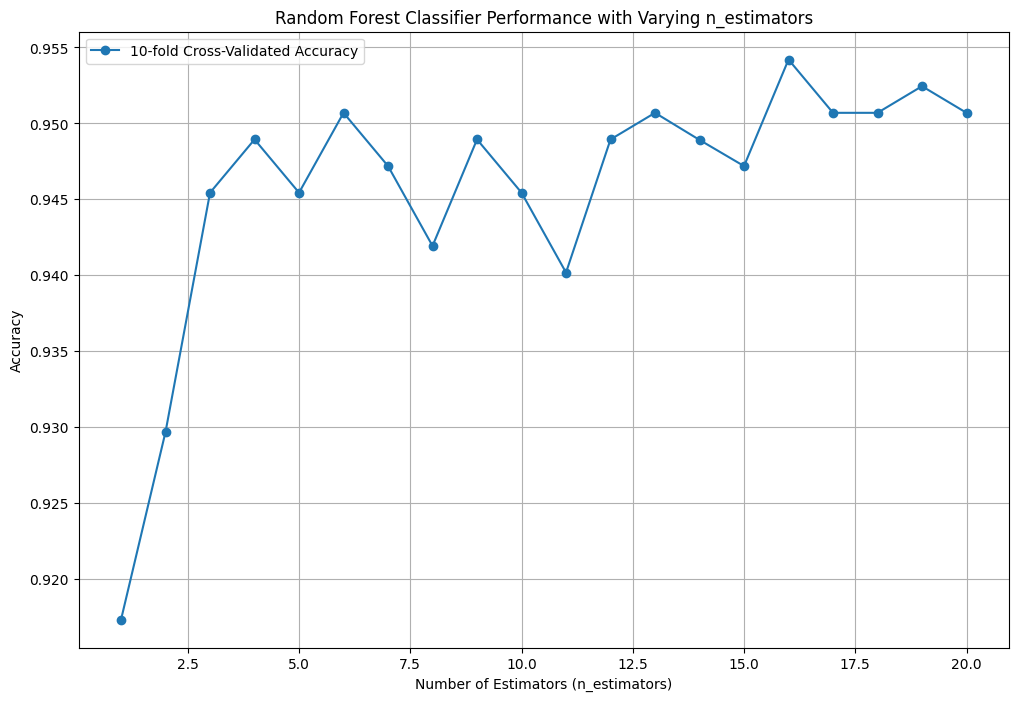

Accuracy with a single tree (n_estimators=1): 0.92
Best cross-validated accuracy with random forests: 0.95 with n_estimators=16


In [18]:
OPTIMAL_MAX_DEPTH = 5  # Use the best max_depth found in question 2(b)ii

# Lists to store the results
n_estimators_range = range(1, 21)
cv_accuracies_rf = []

# Iterate over different n_estimators values
for n_estimators in n_estimators_range:
    # Initialize the RandomForestClassifier
    clf = RandomForestClassifier(max_depth=OPTIMAL_MAX_DEPTH, n_estimators=n_estimators, random_state=RANDOM_STATE)

    # Compute the 10-fold cross-validated accuracy
    cv_accuracy = np.mean(cross_val_score(clf, X, y, cv=KFold(n_splits=10, random_state=RANDOM_STATE, shuffle=True)))
    cv_accuracies_rf.append(cv_accuracy)

# Plotting the results
plt.figure(figsize=FIGSIZE)
plt.plot(n_estimators_range, cv_accuracies_rf, label='10-fold Cross-Validated Accuracy', marker='o')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Performance with Varying n_estimators')
plt.legend()
plt.grid(True)
plt.show()

# Print the accuracies for n_estimators=1 and the best accuracy
print(f"Accuracy with a single tree (n_estimators=1): {cv_accuracies_rf[0]:.2f}")
print(f"Best cross-validated accuracy with random forests: {max(cv_accuracies_rf):.2f} with n_estimators={cv_accuracies_rf.index(max(cv_accuracies_rf)) + 1}")

### (b)
Do you see an improvement using random forests versus using a single tree? (Note: use
the `n_estimators`=1 result as the result for a single tree.)

**Student answer here:** Yes, there is an improvement using random forests compared to using a single tree. The random forest with the optimal number of trees (n_estimators=16) provides a higher cross-validated accuracy than a single decision tree (n_estimators=1).

### (c)
What setting of `n_estimators` gave the best accuracy w.r.t. the cross-validated ac-
curacy?

**Student answer here:** Best cross-validated accuracy with random forests: 0.95 with n_estimators=16

### (d)
For the second plot, again use a `ensemble.RandomForestClassifier`, but this time
you will fix the `n_estimators` parameter and again attempt to find the optimal setting
of a `max_depth`. Use your answer to 3c as the setting for `n_estimators` and follow the
procedure from 2a to find the best setting for max depth. This time, only plot the results
from cross-validation and not the full set, but the plot should be the same structure
as in 2a otherwise (use `max_depth` = 1,2,. . . ,10). Again, use 10 as your random seed.

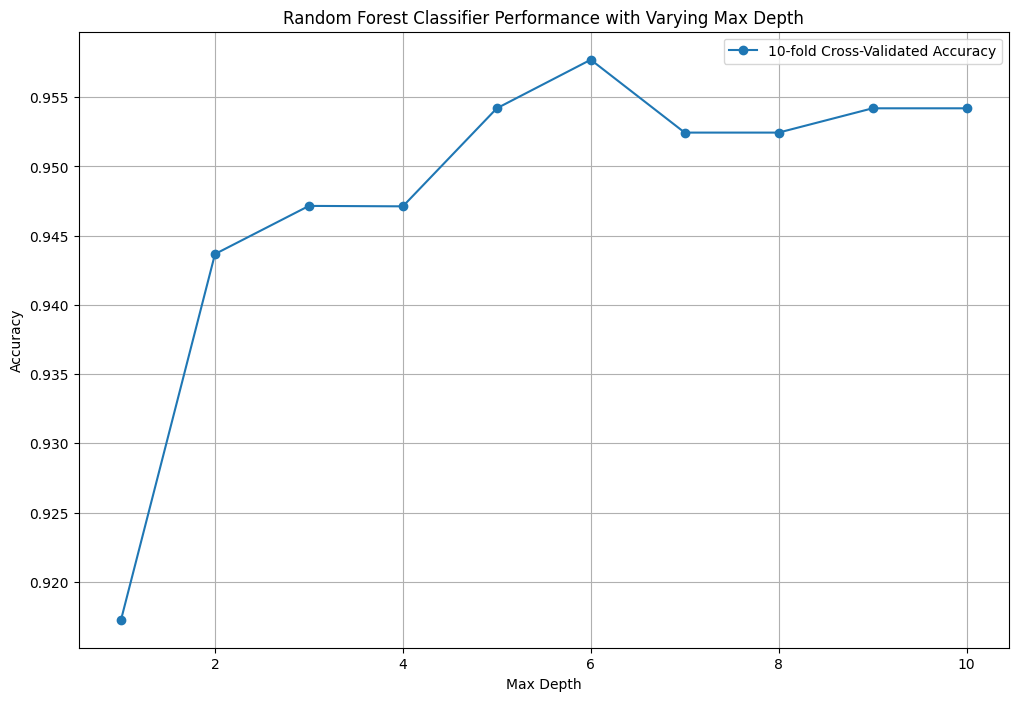

Best max_depth for cross-validated accuracy: [6] with accuracy 0.96


In [19]:
OPTIMAL_N_ESTIMATORS = 16  # Use the best n_estimators found in question 3(c)

# Lists to store the results
max_depth_range = range(1, 11)
cv_accuracies_rf = []

# Iterate over different max_depth values
for max_depth in max_depth_range:
    # Initialize the RandomForestClassifier
    clf = RandomForestClassifier(max_depth=max_depth, n_estimators=OPTIMAL_N_ESTIMATORS, random_state=RANDOM_STATE)

    # Compute the 10-fold cross-validated accuracy
    cv_accuracy = np.mean(cross_val_score(clf, X, y, cv=KFold(n_splits=10, random_state=RANDOM_STATE, shuffle=True)))
    cv_accuracies_rf.append(cv_accuracy)

# Plotting the results
plt.figure(figsize=FIGSIZE)
plt.plot(max_depth_range, cv_accuracies_rf, label='10-fold Cross-Validated Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Performance with Varying Max Depth')
plt.legend()
plt.grid(True)
plt.show()

# Find the best max_depth for cross-validated accuracy
best_cv_accuracy = max(cv_accuracies_rf)
best_max_depth = [depth for depth, accuracy in zip(max_depth_range, cv_accuracies_rf) if accuracy == best_cv_accuracy]

# Print the results
print(f"Best max_depth for cross-validated accuracy: {best_max_depth} with accuracy {best_cv_accuracy:.2f}")

### (e)
In the plot in 3d, is the optimal setting of `max_depth` the same as in 2(b)ii? If not, what
is the new optimal setting of `max_depth`?

**Student answer here:** In the output provided, the new optimal max_depth settings are 6 which are different with the optimal settings found in 2(b)ii 5.

## 4\.
For this last question, we will explore the dependability of our estimates.
### (a)
Make a plot using the following procedure:
#### i.
Using random state values from 0, 1, · · · , 99 calculate the 10-fold cross-validation
accuracy of different `tree.DecisionTreeClassifiers` with max depth settings from
1, 2, · · · , 10.
As before, you should use the same random state value for your classifier and cross-validation.
#### ii.
Then record the best max depth settings for each random state. Be sure to check whether multiple settings
achieve the best accuracy.


Plot the counts for the best max depth settings as a bar chart with the max depth settings on the x-axis and the 'best parameter counts' on the y-axis (number of times that parameter was selected as the best max depth setting).

*Note*: this calculation might take some time. For debugging, try a smaller range of
random states.

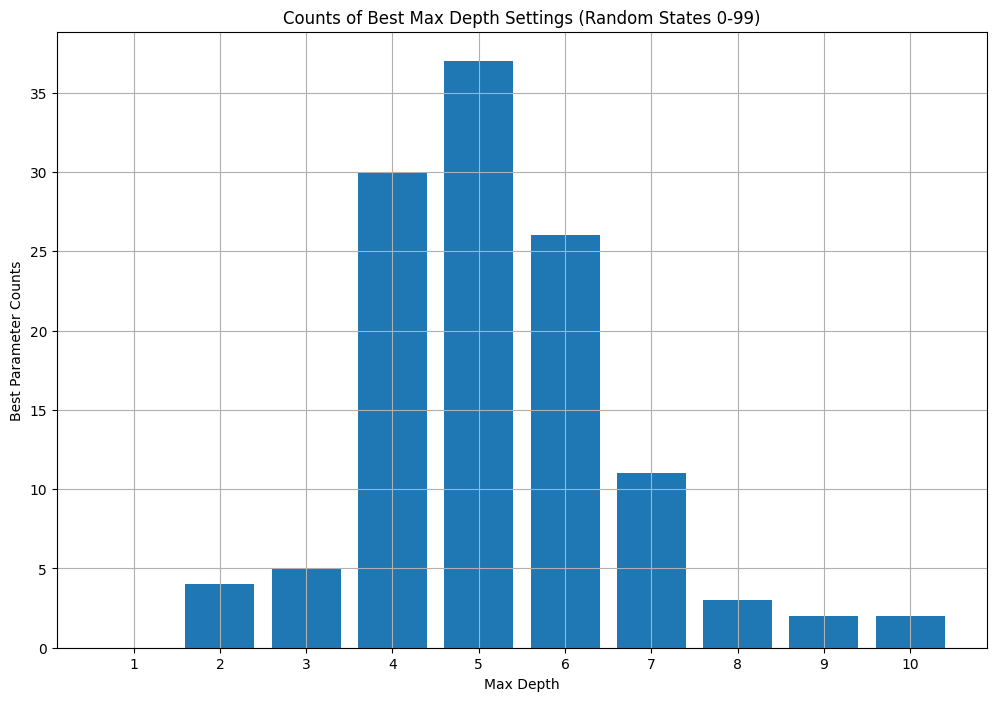

In [21]:
# Assignment Constants
MAX_DEPTH_RANGE = range(1, 11)
RANDOM_STATE_RANGE = range(100)  # 0 to 99
FIGSIZE = (12, 8)

# Dictionary to store the counts of the best max_depth
best_max_depth_counts = defaultdict(int)

# Iterate over different random states
for random_state in RANDOM_STATE_RANGE:
    max_depth_accuracies = []

    # Iterate over different max_depth values
    for max_depth in MAX_DEPTH_RANGE:
        # Initialize the DecisionTreeClassifier
        clf = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)

        # Compute the 10-fold cross-validated accuracy
        cv_accuracy = np.mean(cross_val_score(clf, X, y, cv=KFold(n_splits=10, random_state=random_state, shuffle=True)))
        max_depth_accuracies.append(cv_accuracy)

    # Find the best max_depth(s)
    best_accuracy = max(max_depth_accuracies)
    best_max_depths = [depth for depth, accuracy in zip(MAX_DEPTH_RANGE, max_depth_accuracies) if accuracy == best_accuracy]

    # Record the best max_depth(s)
    for best_max_depth in best_max_depths:
        best_max_depth_counts[best_max_depth] += 1

# Prepare data for plotting
max_depths = list(MAX_DEPTH_RANGE)
counts = [best_max_depth_counts[depth] for depth in max_depths]

# Plotting the results
plt.figure(figsize=FIGSIZE)
plt.bar(max_depths, counts, tick_label=max_depths)
plt.xlabel('Max Depth')
plt.ylabel('Best Parameter Counts')
plt.title('Counts of Best Max Depth Settings (Random States 0-99)')
plt.grid(True)
plt.show()

### (b)
What are the top two most frequent parameter settings?

**Student answer here:** max_depth values of 3 and 4 were the most frequently selected as the best parameter settings across random states from 0 to 99.